In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Time Varying Autoregressive Process')

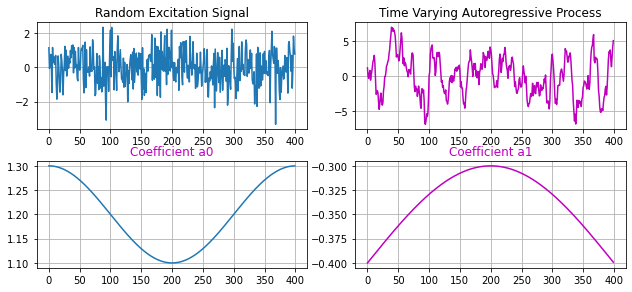

In [5]:
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process with coefficients slowly changing in time
#
a0 = np.array([1.2, -0.4])
A  = np.zeros((N,2))
omega, alpha = N/2, 0.1
for n in range(N):
    A[n,0] = a0[0] + alpha * np.cos(2*np.pi*n/N)
    A[n,1] = a0[1] + alpha * np.sin(np.pi*n/N)
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, A[n,:]) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))

plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")

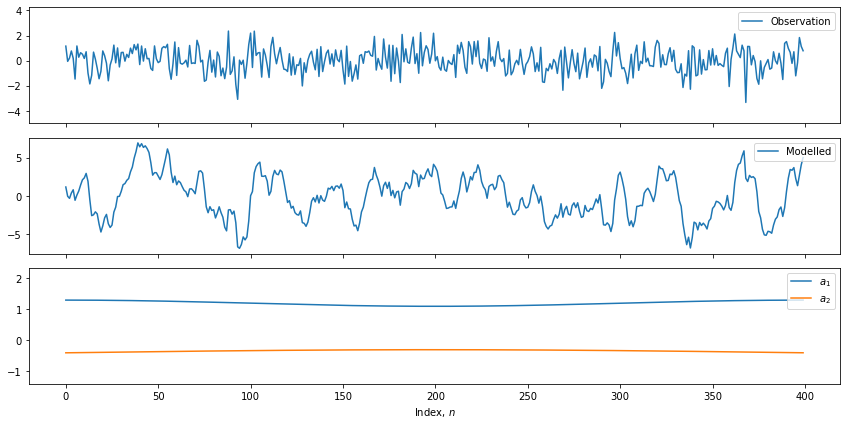

In [27]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3, sharex=True)
axes[0].plot(np.arange(0, N), ex, label='Observation')
axes[0].set_ylim([ex.min()*1.5, ex.max()*1.8])
axes[0].legend(loc=1)
# axes[0].set_title('Input Signal', fontsize=16) # input signal

axes[1].plot(np.arange(0, N), S, label='Modelled')
# axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
# axes[1].set_title('Reconstructed Signal', fontsize=16)

axes[2].plot(np.arange(0, N), A[:,0], label=r'$a_1$') # AR parameters varying
axes[2].plot(np.arange(0, N), A[:,1], label=r'$a_2$') # AR parameters varying
axes[2].set_ylim([A.min(axis=0).min()*3.5, A.max(axis=0).max()*1.8])
axes[2].set_xlabel('Index, $n$')
axes[2].legend(loc=1)


plt.tight_layout()
plt.savefig('../figures/autoregression/AR_noise_modelling_nonstationary.pdf')
plt.show()